In [223]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

In [224]:
df = pd.read_csv('/content/drive/MyDrive/Obesity Risk/sample_submission.csv')
df

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight
...,...,...
13835,34593,Normal_Weight
13836,34594,Normal_Weight
13837,34595,Normal_Weight
13838,34596,Normal_Weight


In [225]:
traindf=pd.read_csv('/content/drive/MyDrive/Obesity Risk/train.csv')
traindf=traindf.drop('id',axis=1)
traindf

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [226]:
for i in traindf.columns:
  print(i,traindf[i].isnull().sum(),traindf[i].dtype)

Gender 0 object
Age 0 float64
Height 0 float64
Weight 0 float64
family_history_with_overweight 0 object
FAVC 0 object
FCVC 0 float64
NCP 0 float64
CAEC 0 object
SMOKE 0 object
CH2O 0 float64
SCC 0 object
FAF 0 float64
TUE 0 float64
CALC 0 object
MTRANS 0 object
NObeyesdad 0 object


# feature selection

In [227]:
y=traindf[['NObeyesdad']]

In [228]:
y['NObeyesdad'] = y['NObeyesdad'].astype('category')
d = dict(enumerate(y['NObeyesdad'].cat.categories))

<ipython-input-228-51fd58eae558>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [229]:
di = {"Insufficient_Weight":0,
      "Normal_Weight":1,
      "Overweight_Level_I":2,
      "Overweight_Level_II":3,
      "Obesity_Type_I" : 4,
      "Obesity_Type_II" : 5,
      "Obesity_Type_III":6}
y['NObeyesdad'] = y['NObeyesdad'].map(di)

<ipython-input-229-5c56dc0634d0>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [230]:
y.value_counts()

NObeyesdad
6             4046
5             3248
1             3082
4             2910
0             2523
3             2522
2             2427
dtype: int64

In [231]:
x=traindf.drop('NObeyesdad',axis=1)
xdt=x

In [232]:
import plotly.express as px
for i in traindf.columns:
  fig = px.histogram(traindf, x=i , color="NObeyesdad")
  fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Test

In [233]:
testdf=pd.read_csv('/content/drive/MyDrive/Obesity Risk/test.csv')
testdf=testdf.drop('id',axis=1)
testdf

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [234]:
for i in testdf.columns:
  print(i,testdf[i].isnull().sum(),testdf[i].dtype)

Gender 0 object
Age 0 float64
Height 0 float64
Weight 0 float64
family_history_with_overweight 0 object
FAVC 0 object
FCVC 0 float64
NCP 0 float64
CAEC 0 object
SMOKE 0 object
CH2O 0 float64
SCC 0 object
FAF 0 float64
TUE 0 float64
CALC 0 object
MTRANS 0 object


In [235]:
testdf=testdf.fillna(0)
xtest=testdf

In [236]:
traindf.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


fix class imbalances

In [237]:
over = RandomOverSampler()
#x,y = over.fit_resample(x,y)
x

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile


In [238]:
y

,NObeyesdad
0,3
1,1
2,0
3,6
4,3
...,...
20753,5
20754,0
20755,5
20756,3


# Nommalize numeric data encode categorical *data*

In [239]:
def encodescale(tempdf):
  ob = tempdf.columns.to_list()
  temp=""
  for i in ob:
      temp = tempdf[i]
      if(tempdf[i].dtype=='object'):
        # encode class values as integers
        encoder = LabelEncoder()
        encoder.fit(temp)
        encoded_temp = encoder.transform(temp)
        tempdf[i]=encoded_temp
      else:
        scaler = StandardScaler()
        tempdf[i]=scaler.fit_transform(temp.values.reshape(-1,1))
  return tempdf



In [240]:
#y=traindf['NObeyesdad']
#x=traindf.drop('NObeyesdad',axis=1)

In [241]:
xcom=pd.concat([x,xtest])
xcom=encodescale(xcom)
xcom

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0.097125,0.003156,-0.228998,1,1,-0.835030,0.319748,2,0,1.202683,0,-1.166547,0.598886,2,3
1,0,-1.026697,-1.589647,-1.167979,1,1,-0.835030,0.343353,1,0,-0.049985,0,0.025192,0.637808,3,0
2,0,-1.026697,0.133563,-1.428102,1,1,-1.059354,-1.901298,2,0,-0.197013,0,-0.134447,1.752153,3,3
3,0,-0.511666,0.125258,1.659050,1,1,1.042690,0.343353,2,0,-0.584699,0,0.582763,0.274179,2,3
4,1,1.352648,2.440044,0.232618,1,1,0.441189,-1.110191,2,0,-0.083045,0,1.178764,0.524850,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,-0.097389,0.246472,-0.367527,1,0,0.691996,0.343353,2,0,-1.690520,0,-0.204723,0.271587,2,3
13836,0,0.891978,-1.248327,-0.977671,0,1,1.042690,0.343353,2,0,-0.049985,0,-1.166547,-1.016544,2,3
13837,0,-0.165803,-1.298990,-1.648446,0,1,1.042690,-0.683018,1,0,-0.049985,0,1.157154,0.637808,2,3
13838,1,-0.503422,-0.907007,-1.320226,1,1,-0.835030,0.343353,2,0,-0.049985,0,2.408672,2.292160,3,3


# test train validation split

In [242]:
x = xcom.iloc[:len(x)]
xtest = xcom.iloc[len(x):]

In [243]:
xtest

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0.525665,1.690369,1.254428,1,1,0.927428,0.343353,2,0,1.304488,0,-0.147133,-1.016544,2,3
1,0,-0.503422,-1.134554,-0.825424,1,1,-0.835030,-2.483103,2,0,1.590550,0,0.025192,-1.016544,2,3
2,0,0.368703,-0.641290,0.910212,1,1,1.042690,0.343353,2,0,0.970226,0,-1.166547,-0.602126,2,3
3,1,-0.507041,-1.667844,0.608328,1,1,-0.835030,0.312134,2,0,1.240160,0,-1.053509,-1.016544,2,3
4,0,0.368703,-0.822861,0.652717,1,1,1.042690,0.343353,2,0,1.022156,0,-1.166547,0.209445,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,-0.097389,0.246472,-0.367527,1,0,0.691996,0.343353,2,0,-1.690520,0,-0.204723,0.271587,2,3
13836,0,0.891978,-1.248327,-0.977671,0,1,1.042690,0.343353,2,0,-0.049985,0,-1.166547,-1.016544,2,3
13837,0,-0.165803,-1.298990,-1.648446,0,1,1.042690,-0.683018,1,0,-0.049985,0,1.157154,0.637808,2,3
13838,1,-0.503422,-0.907007,-1.320226,1,1,-0.835030,0.343353,2,0,-0.049985,0,2.408672,2.292160,3,3


In [244]:
x

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0.097125,0.003156,-0.228998,1,1,-0.835030,0.319748,2,0,1.202683,0,-1.166547,0.598886,2,3
1,0,-1.026697,-1.589647,-1.167979,1,1,-0.835030,0.343353,1,0,-0.049985,0,0.025192,0.637808,3,0
2,0,-1.026697,0.133563,-1.428102,1,1,-1.059354,-1.901298,2,0,-0.197013,0,-0.134447,1.752153,3,3
3,0,-0.511666,0.125258,1.659050,1,1,1.042690,0.343353,2,0,-0.584699,0,0.582763,0.274179,2,3
4,1,1.352648,2.440044,0.232618,1,1,0.441189,-1.110191,2,0,-0.083045,0,1.178764,0.524850,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,0.218189,0.761205,1.008660,1,1,0.891692,0.343353,2,0,0.199063,0,0.419085,-0.691167,2,3
20754,1,-1.026697,0.116953,-1.434411,0,1,1.042690,1.756581,1,0,-1.690520,0,1.216932,0.637808,2,3
20755,1,-0.660226,1.363419,0.681078,1,1,-0.069264,0.343353,2,0,-0.049985,0,0.213535,0.966096,3,3
20756,1,1.738454,0.003179,-0.158578,1,1,0.425367,-1.110191,2,0,0.187627,0,-1.166547,0.594520,3,0


In [245]:
y

,NObeyesdad
0,3
1,1
2,0
3,6
4,3
...,...
20753,5
20754,0
20755,5
20756,3


In [246]:
xtest

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0.525665,1.690369,1.254428,1,1,0.927428,0.343353,2,0,1.304488,0,-0.147133,-1.016544,2,3
1,0,-0.503422,-1.134554,-0.825424,1,1,-0.835030,-2.483103,2,0,1.590550,0,0.025192,-1.016544,2,3
2,0,0.368703,-0.641290,0.910212,1,1,1.042690,0.343353,2,0,0.970226,0,-1.166547,-0.602126,2,3
3,1,-0.507041,-1.667844,0.608328,1,1,-0.835030,0.312134,2,0,1.240160,0,-1.053509,-1.016544,2,3
4,0,0.368703,-0.822861,0.652717,1,1,1.042690,0.343353,2,0,1.022156,0,-1.166547,0.209445,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,-0.097389,0.246472,-0.367527,1,0,0.691996,0.343353,2,0,-1.690520,0,-0.204723,0.271587,2,3
13836,0,0.891978,-1.248327,-0.977671,0,1,1.042690,0.343353,2,0,-0.049985,0,-1.166547,-1.016544,2,3
13837,0,-0.165803,-1.298990,-1.648446,0,1,1.042690,-0.683018,1,0,-0.049985,0,1.157154,0.637808,2,3
13838,1,-0.503422,-0.907007,-1.320226,1,1,-0.835030,0.343353,2,0,-0.049985,0,2.408672,2.292160,3,3


# normalize encoded data

In [247]:
x = xcom.iloc[:len(x)]
xtest = xcom.iloc[len(x):]
x

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0.097125,0.003156,-0.228998,1,1,-0.835030,0.319748,2,0,1.202683,0,-1.166547,0.598886,2,3
1,0,-1.026697,-1.589647,-1.167979,1,1,-0.835030,0.343353,1,0,-0.049985,0,0.025192,0.637808,3,0
2,0,-1.026697,0.133563,-1.428102,1,1,-1.059354,-1.901298,2,0,-0.197013,0,-0.134447,1.752153,3,3
3,0,-0.511666,0.125258,1.659050,1,1,1.042690,0.343353,2,0,-0.584699,0,0.582763,0.274179,2,3
4,1,1.352648,2.440044,0.232618,1,1,0.441189,-1.110191,2,0,-0.083045,0,1.178764,0.524850,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,0.218189,0.761205,1.008660,1,1,0.891692,0.343353,2,0,0.199063,0,0.419085,-0.691167,2,3
20754,1,-1.026697,0.116953,-1.434411,0,1,1.042690,1.756581,1,0,-1.690520,0,1.216932,0.637808,2,3
20755,1,-0.660226,1.363419,0.681078,1,1,-0.069264,0.343353,2,0,-0.049985,0,0.213535,0.966096,3,3
20756,1,1.738454,0.003179,-0.158578,1,1,0.425367,-1.110191,2,0,0.187627,0,-1.166547,0.594520,3,0


# test validation split

In [248]:
from sklearn.model_selection import train_test_split
X_traint, X_valid, y_traint, y_valid = train_test_split(x, y, test_size=0.30, random_state=42)

In [249]:
di = {0:"Obesity_Type_III", 1:"Obesity_Type_II", 2:"Normal_Weight",
       3:"Obesity_Type_I", 4:"Insufficient_Weight", 5:"Overweight_Level_II",
       6:"Overweight_Level_I"}

# Random forest


In [250]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

random_forest = RandomForestClassifier(n_estimators=1000)
model = random_forest.fit(X_traint, y_traint)
accuracy = round(random_forest.score(x, y) * 100, 2)
accuracy

<ipython-input-250-8a5390f7a14d>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



96.99

In [251]:
predictions = model.predict(X_valid)
accuracy_score(y_valid, predictions)

0.8996467565831727

In [252]:
print(predictions)

[6 2 4 ... 0 4 0]


In [253]:
output=pd.DataFrame()
output['NObeyesdad'] = predictions
output['NObeyesdad'] = output['NObeyesdad'].map(di)
output['id'] = range(20758, 20758+len(output))
output[['id','NObeyesdad']].to_csv("/content/drive/MyDrive/Obesity Risk/outputrf.csv",index=False)

# Decision Forest

In [254]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
modelft = dt.fit(X_traint, y_traint)
accuracy = round(random_forest.score(x, y) * 100, 2)
accuracy

96.99

In [255]:
predictions = model.predict(X_valid)
accuracy_score(y_valid, predictions)

0.8996467565831727

In [256]:
print(predictions)

[6 2 4 ... 0 4 0]


In [257]:
output=pd.DataFrame()
output['NObeyesdad'] = predictions
output['NObeyesdad'] = output['NObeyesdad'].map(di)
output['id'] = range(20758, 20758+len(output))
output[['id','NObeyesdad']].to_csv("/content/drive/MyDrive/Obesity Risk/outputdt.csv",index=False)

# construct model

In [258]:
import tensorflow as tf
import keras


In [259]:
model=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(16,activation='relu'),
        #tf.keras.layers.Dropout(rate=0.5),
        #tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(32,activation='relu'),
        #tf.keras.layers.Dropout(rate=0.5),
        #tf.keras.layers.Attention(use_scale=False, score_mode="dot", dropout=0.0, seed=None),
        #tf.keras.layers.Dense(32,activation='selu'),

        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(128,activation='selu'),
        tf.keras.layers.Dense(128,activation='selu'),
        # tf.keras.layers.Dense(128,activation='selu'),
        # tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        #tf.keras.layers.GlobalMaxPooling2D(pool_size=2, strides=2, padding="valid"),
        tf.keras.layers.Dense(32,activation='selu'),
        #tf.keras.layers.Dense(32,activation='selu'),
        #tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(7,activation='softmax')
    ]
)

In [260]:
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# model evaluation with trianing

In [261]:
model.evaluate(x,y)

649/649 [==============================] - 2s 2ms/step - loss: 1.9675 - accuracy: 0.1216


[1.9674756526947021, 0.12163984775543213]

# model training

In [262]:
hist = model.fit(X_traint, y_traint,batch_size=60,epochs=400)

Epoch 1/400
243/243 [==============================] - 3s 3ms/step - loss: 1.0300 - accuracy: 0.5902
Epoch 2/400
243/243 [==============================] - 1s 3ms/step - loss: 0.5884 - accuracy: 0.7674
Epoch 3/400
243/243 [==============================] - 1s 3ms/step - loss: 0.4926 - accuracy: 0.8134
Epoch 4/400
243/243 [==============================] - 1s 4ms/step - loss: 0.4550 - accuracy: 0.8326
Epoch 5/400
243/243 [==============================] - 1s 5ms/step - loss: 0.4289 - accuracy: 0.8425
Epoch 6/400
243/243 [==============================] - 1s 5ms/step - loss: 0.4113 - accuracy: 0.8494
Epoch 7/400
243/243 [==============================] - 1s 6ms/step - loss: 0.4011 - accuracy: 0.8557
Epoch 8/400
243/243 [==============================] - 1s 3ms/step - loss: 0.3982 - accuracy: 0.8550
Epoch 9/400
243/243 [==============================] - 1s 5ms/step - loss: 0.3897 - accuracy: 0.8621
Epoch 10/400
243/243 [==============================] - 1s 3ms/step - loss: 0.3830 - accura

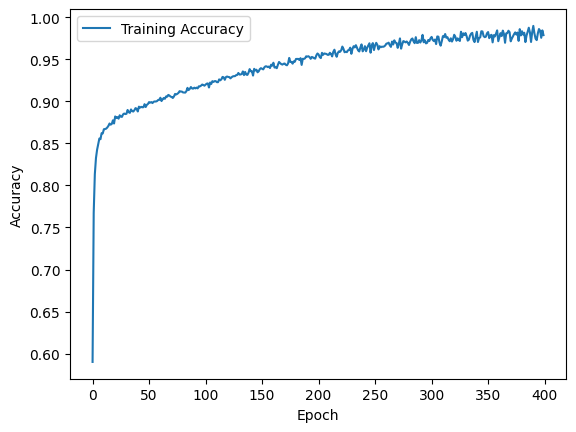

In [263]:
plt.plot(hist.history['accuracy'],label='Training Accuracy')
#plt.plot(hist.history['loss'],label='loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# model testing

In [264]:
y_pred = np.argmax(model.predict(X_valid), axis=1)
y_pred

195/195 [==============================] - 1s 3ms/step


array([6, 2, 2, ..., 0, 4, 0])

In [265]:
accuracy_score(y_valid, y_pred)

0.8273924213230571

In [266]:
len(y_pred)

6228

In [267]:
output=pd.DataFrame()
output['NObeyesdad'] = =np.argmax(model.predict(x_test), axis=1)
output['NObeyesdad'] = output['NObeyesdad'].map(di)
output['id'] = range(20758, 20758+len(output))
output[['id','NObeyesdad']].to_csv("/content/drive/MyDrive/Obesity Risk/outputnn.csv",index=False)

SyntaxError: invalid syntax (<ipython-input-267-43d89d5c458d>, line 2)